In [1]:
#Packages related to general operating system & warnings
import gc
import os 
import warnings
warnings.filterwarnings('ignore')


## EDA and DV Modules

In [2]:

from pandas_profiling import ProfileReport

#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling
import scipy.stats as stats

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

#from matplotlib.backends.backend_pdf import PdfPage

# Notebook configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<Figure size 432x216 with 0 Axes>

## Data preparation and preprocessing modules

In [3]:
#Modules related to preprocessing (Imputation of missings, standardiszation, new features creation, converting categorical to numerical)
from sklearn.impute import MissingIndicator, SimpleImputer
#from sklearn.preprocessing import Imputer, PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

## Feature Engineering modules

In [4]:
#Moudles related to feature selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, SelectPercentile, f_classif, mutual_info_classif, f_regression, VarianceThreshold, SelectFromModel, mutual_info_classif, mutual_info_regression, SelectFpr, SelectFdr, SelectFwe
#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

## Modelling modules

In [6]:
#Modules related key techniques of supervised learning and metrics
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#export_graphviz
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC,SVC

from sklearn.metrics import confusion_matrix
#Module related to calculation of metrics
from sklearn import metrics

## Saving the models

In [7]:
#Modules related to saving python objects permanantly
#from sklearn.externals import joblib

#Dumping model into current directory: joblib.dump(model_xg,"my_model.pkl") 
#Loading model: my_model_loaded=joblib.load("my_model.pkl")

import pickle

In [8]:
#Changing the directory to data folder
%cd ../input/cycbersecurity-network-intrusion-dataset

/kaggle/input/cycbersecurity-network-intrusion-dataset


# 1.Data Prep

In [9]:
at_buffer = pd.read_csv('Data_of_Attack_Back_BufferOverflow.csv',)
at_FTP = pd.read_csv('Data_of_Attack_Back_FTPWrite.csv',header = None)
at_gpass =pd.read_csv('Data_of_Attack_Back_GuessPassword.csv')
at_Neptune = pd.read_csv('Data_of_Attack_Back_Neptune.csv')
at_NMap = pd.read_csv('Data_of_Attack_Back_NMap.csv')
normal  = pd.read_csv('Data_of_Attack_Back_Normal.csv')
at_portsweep = pd.read_csv('Data_of_Attack_Back_PortSweep.csv')
at_rootkit = pd.read_csv('Data_of_Attack_Back_RootKit.csv')
at_satan = pd.read_csv('Data_of_Attack_Back_Satan.csv')

In [10]:
#Creating a new feature of attack_type
at_buffer['attack'] = 'Buffer_overflow'
at_FTP['attack'] = 'FTPWrite'
at_gpass['attack'] = 'GuessPassword'
at_Neptune['attack'] = 'Neptune'
at_NMap['attack'] = 'NMap'
normal['attack'] = 'Normal'
at_portsweep['attack'] = 'Back_PortSweep'
at_rootkit['attack'] = 'RootKit'
at_satan['attack'] = 'Satan'


In [11]:
at_FTP.columns = normal.columns

In [12]:
#combining all datasets to one
data = pd.concat([at_buffer,at_FTP,at_gpass,at_Neptune,at_NMap,at_portsweep,at_rootkit,at_satan,normal],axis=0)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813576 entries, 0 to 576709
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      813576 non-null  float64
 1    protocol_type                813576 non-null  float64
 2    service                      813576 non-null  float64
 3    flag                         813576 non-null  float64
 4    src_bytes                    813576 non-null  float64
 5    dst_bytes                    813576 non-null  float64
 6    land                         813576 non-null  int64  
 7    wrong_fragment               813576 non-null  int64  
 8    urgent                       813576 non-null  float64
 9    hot                          813576 non-null  float64
 10   num_failed_logins            813576 non-null  float64
 11   logged_in                    813576 non-null  float64
 12   num_compromised              813576 non-nul

In [14]:
data.columns = data.columns.str.replace(" ","")

In [15]:
data.attack.unique()

array(['Buffer_overflow', 'FTPWrite', 'GuessPassword', 'Neptune', 'NMap',
       'Back_PortSweep', 'RootKit', 'Satan', 'Normal'], dtype=object)

In [16]:
#Creating a binary flag and multinomial flag of attack
#Multinomial attack flags are
dim = {'Normal' :0,'Buffer_overflow':1,'FTPWrite':2,'GuessPassword':3,'Neptune':4,'NMap':5,'Back_PortSweep':6,'RootKit':7,'Satan':8}

data['attack_B'] = np.where(data['attack']=='Normal',0,1)
data['attack_M'] = data['attack'].map(dim)

In [17]:
#dropping attack 
data.drop(columns = ['attack'],inplace =True)

In [18]:
del [[at_buffer,at_FTP,at_gpass,at_Neptune,at_NMap,at_portsweep,at_rootkit,at_satan,normal]]
gc.collect()

116

# EDA and Data Preprocessing

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813576 entries, 0 to 576709
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     813576 non-null  float64
 1   protocol_type                813576 non-null  float64
 2   service                      813576 non-null  float64
 3   flag                         813576 non-null  float64
 4   src_bytes                    813576 non-null  float64
 5   dst_bytes                    813576 non-null  float64
 6   land                         813576 non-null  int64  
 7   wrong_fragment               813576 non-null  int64  
 8   urgent                       813576 non-null  float64
 9   hot                          813576 non-null  float64
 10  num_failed_logins            813576 non-null  float64
 11  logged_in                    813576 non-null  float64
 12  num_compromised              813576 non-null  float64
 13 

In [20]:
data.isnull().sum().sum()

0

In [21]:
#Creating ProfileReport using pandas profiling
#report = ProfileReport(data)
#Creating ProfileReport using pandas profiling
#report = ProfileReport(data)

In [22]:
data.shape

(813576, 43)

In [23]:
for i in data.columns:
    if (data[i].dtype == int) and len:
        print(i,data[i].unique())

land [0]
wrong_fragment [0]
num_outbound_cmds [0]
attack_B [1 0]
attack_M [1 2 3 4 5 6 7 8 0]


In [24]:
#separating numerical and binary variables

cat_col = ['attack_B','attack_M']
constant = ['land','wrong_fragment','num_outbound_cmds']
num_cols = list(set(data.columns)-set(cat_col)-set(constant))

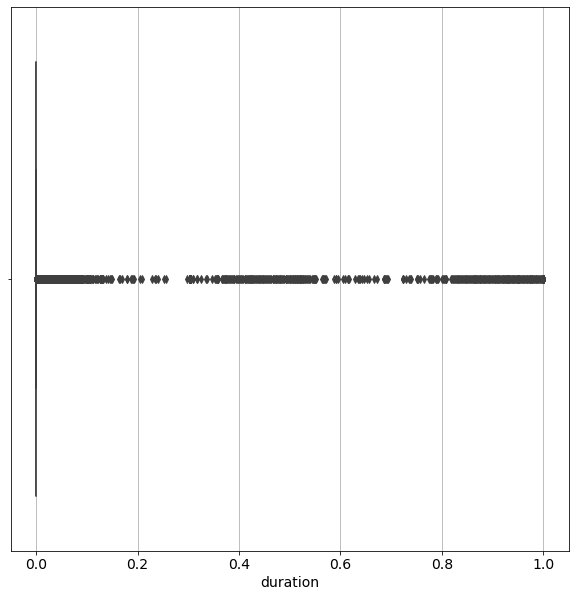

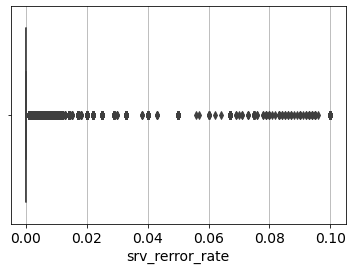

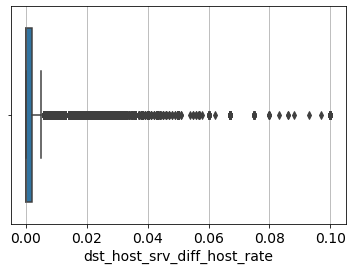

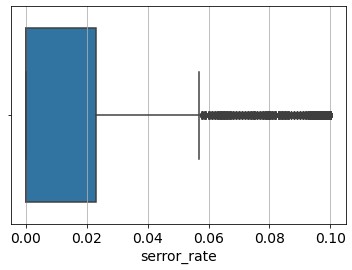

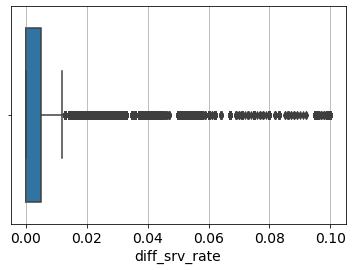

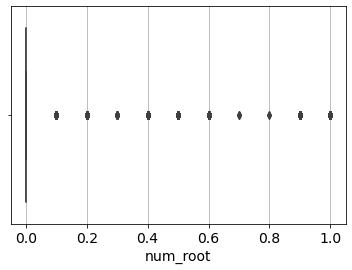

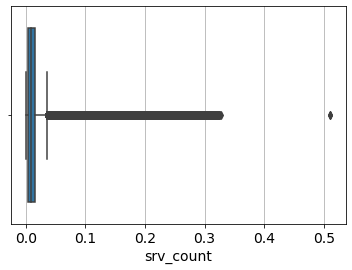

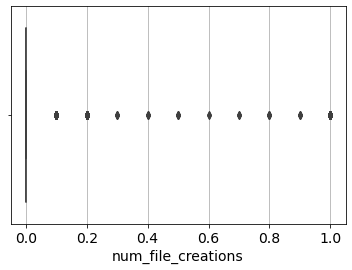

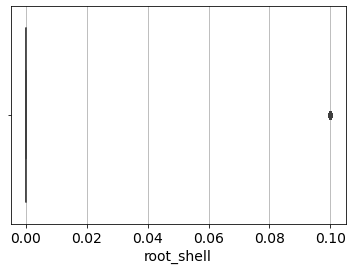

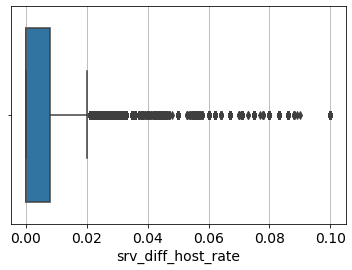

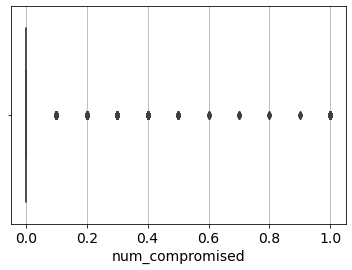

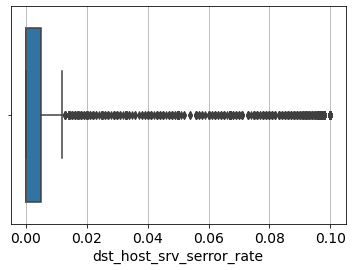

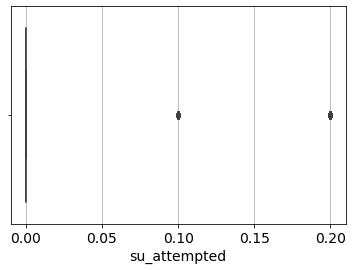

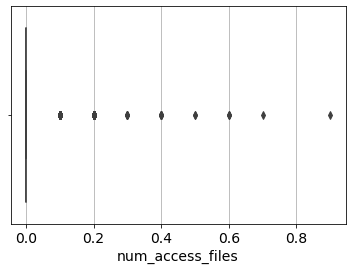

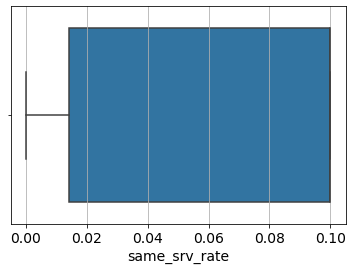

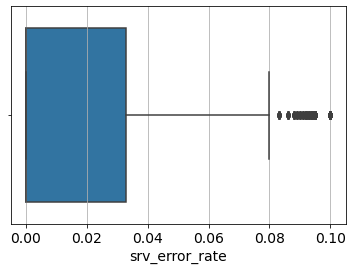

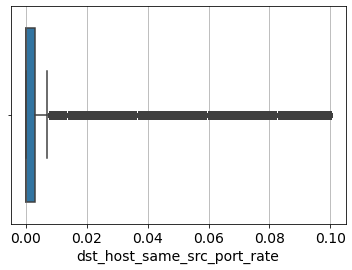

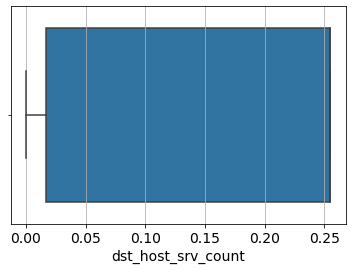

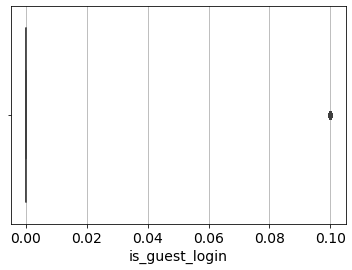

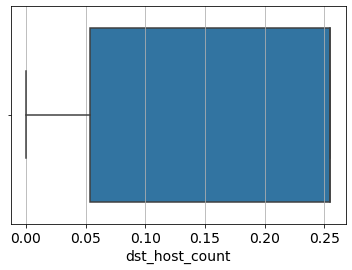

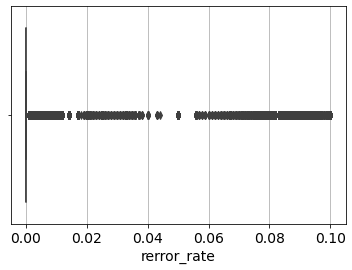

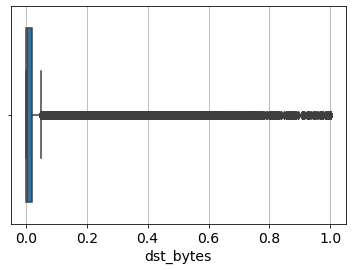

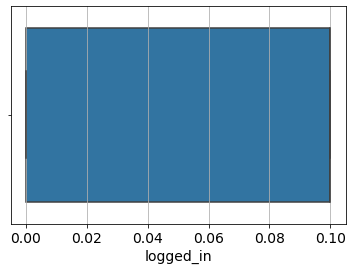

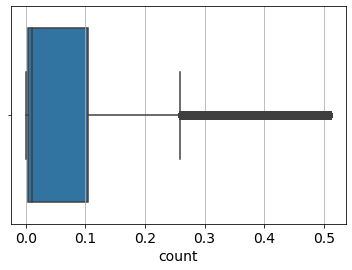

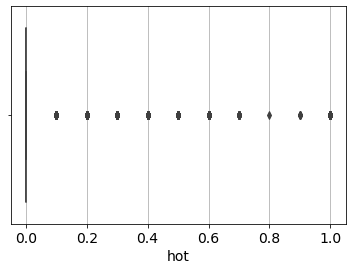

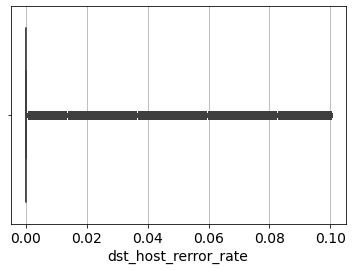

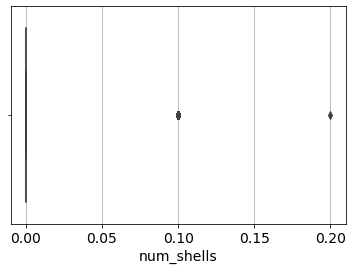

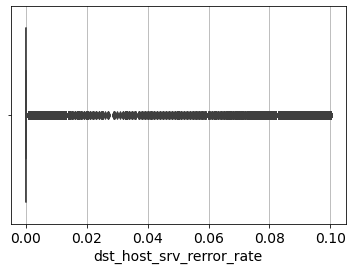

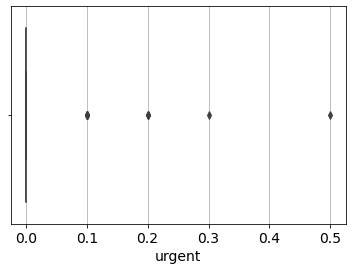

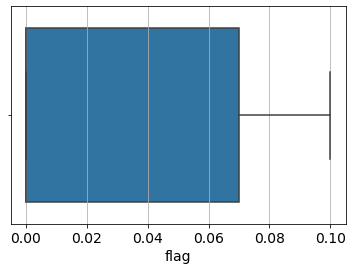

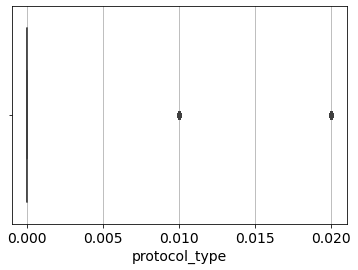

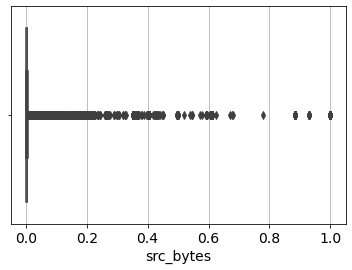

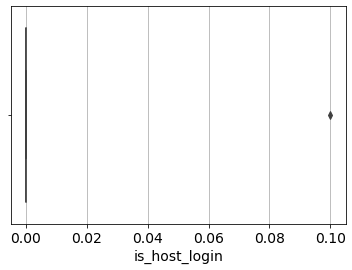

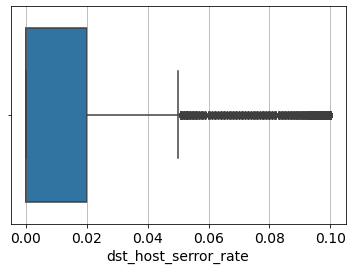

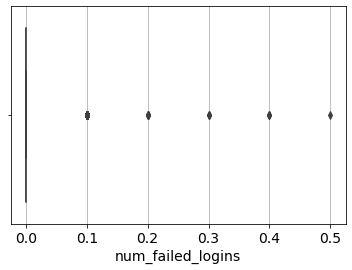

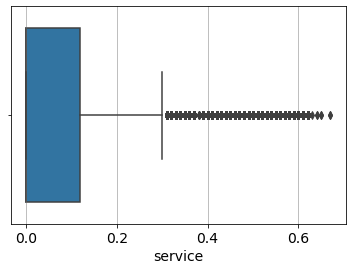

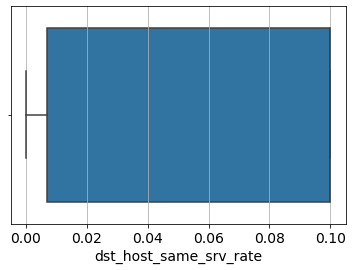

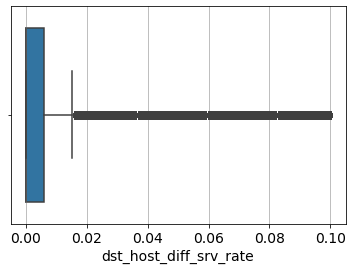

In [25]:
#Detecting outliers in the data
plt.figure(figsize = (10,10))
for i_var in data[num_cols].columns:
    sns.boxplot(data[i_var])
    plt.show()


In [26]:
#Outlier treatement for all varaiables
def Outlier(x):
        x.clip(lower = np.quantile(x,0.01),upper =np.quantile(x,0.99),inplace= True)
        return x

In [27]:
data[num_cols]=data[num_cols].apply(Outlier)

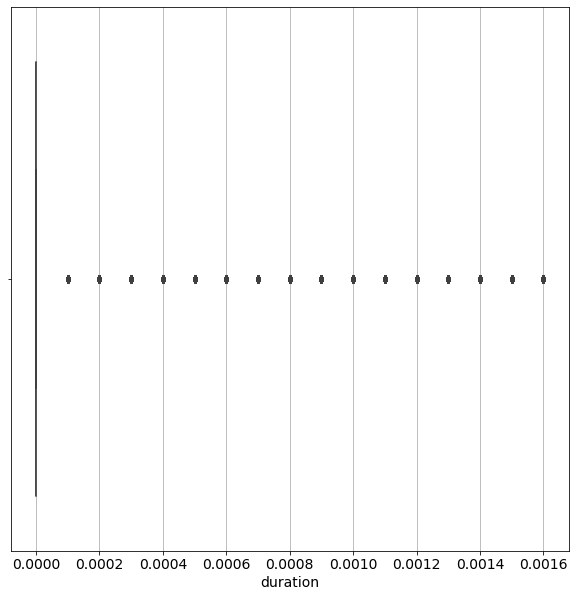

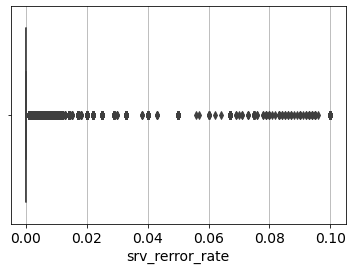

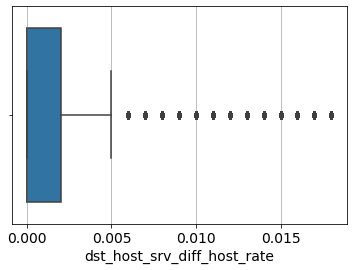

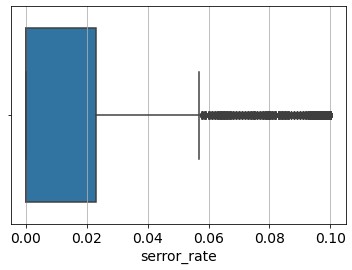

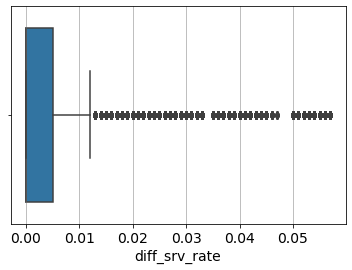

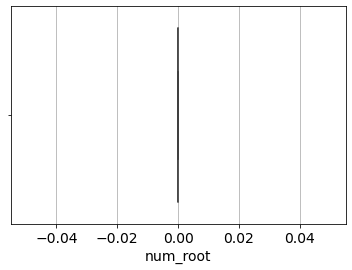

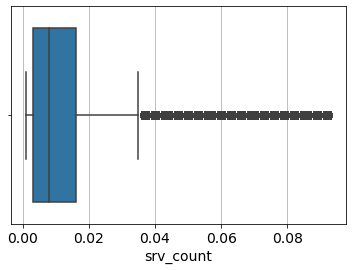

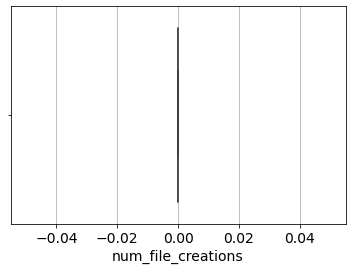

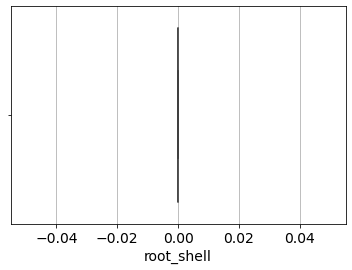

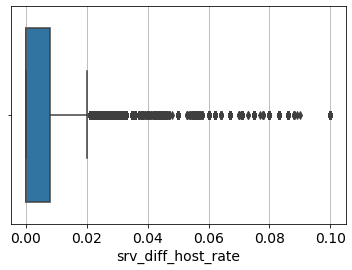

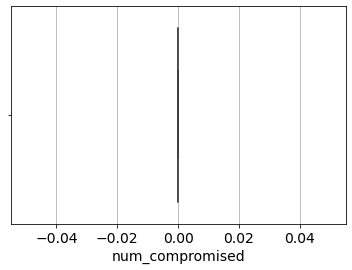

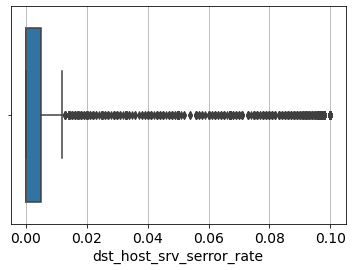

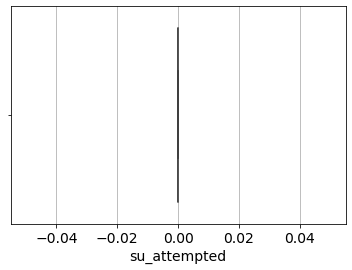

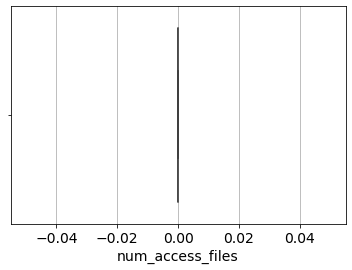

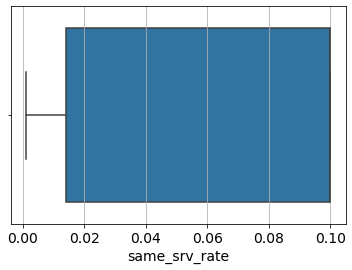

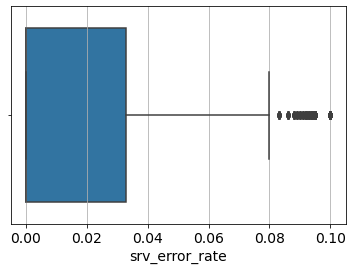

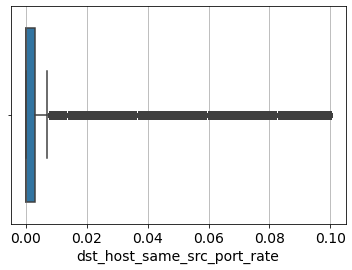

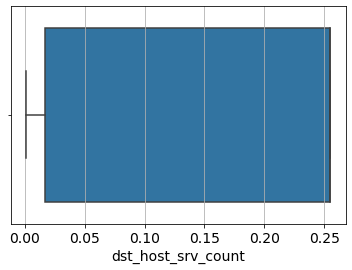

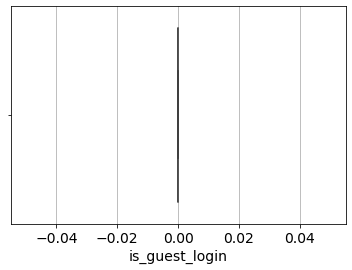

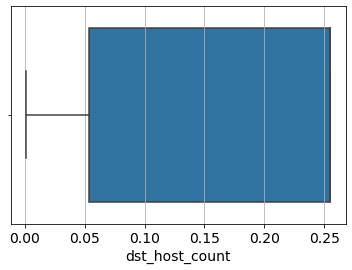

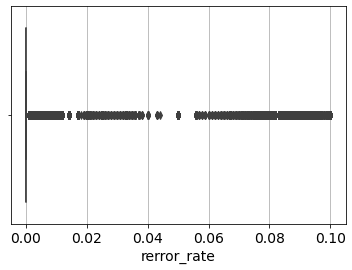

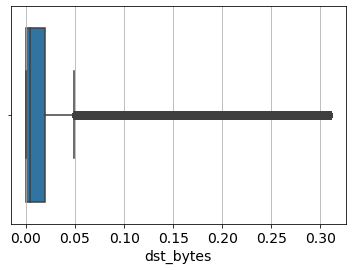

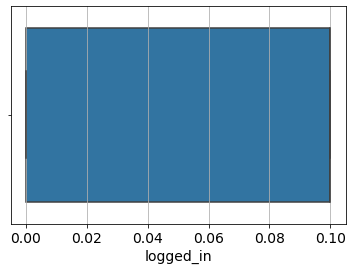

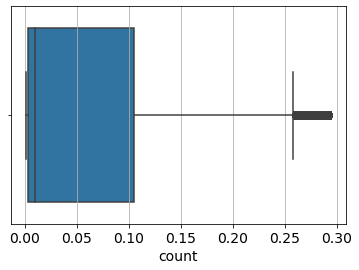

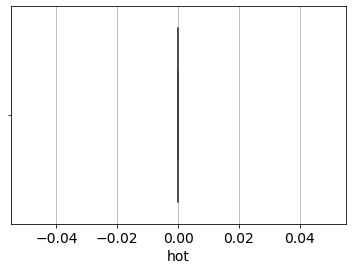

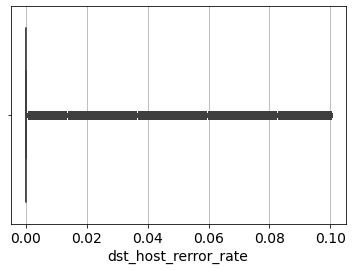

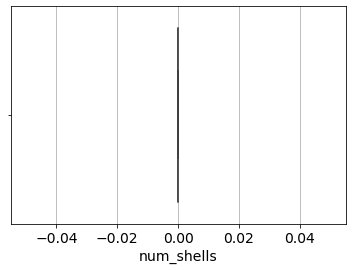

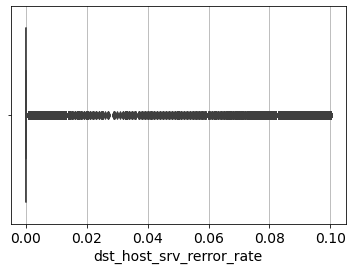

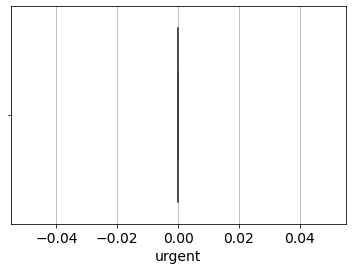

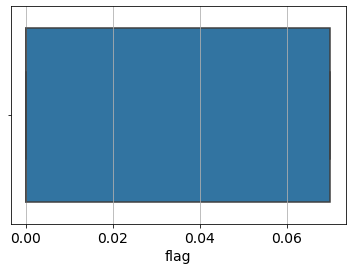

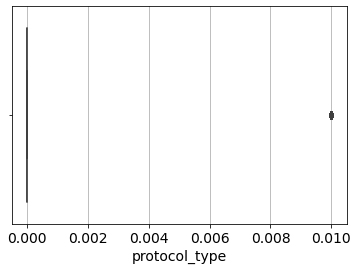

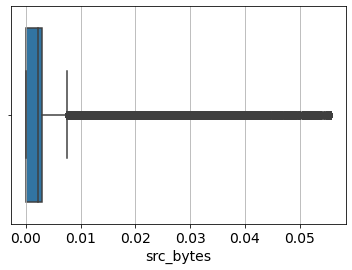

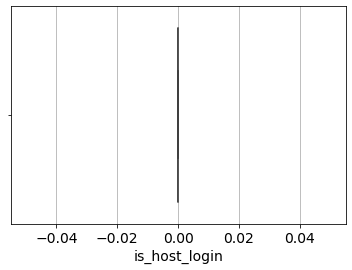

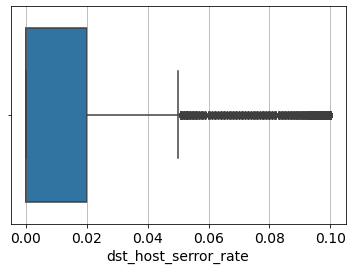

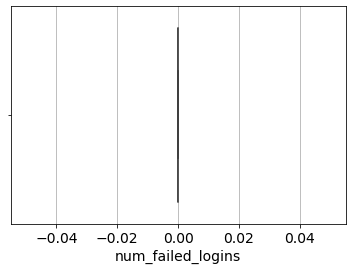

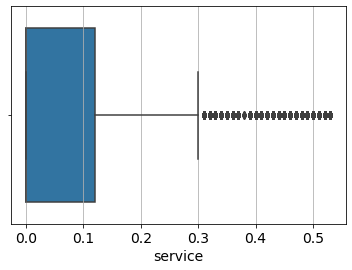

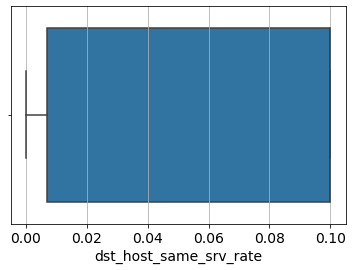

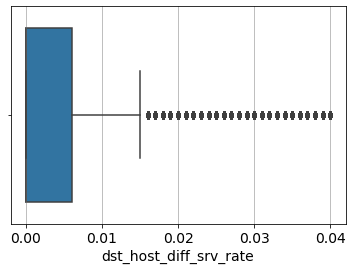

In [28]:
plt.figure(figsize = (10,10))
for i_var in data[num_cols].columns:
    sns.boxplot(data[i_var])
    plt.show()


In [29]:
#Univaraiate Analysis
#Data audit report
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [30]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [31]:
data[num_cols].apply(continuous_var_summary)

,duration,srv_rerror_rate,dst_host_srv_diff_host_rate,serror_rate,diff_srv_rate,num_root,srv_count,num_file_creations,root_shell,srv_diff_host_rate,num_compromised,dst_host_srv_serror_rate,su_attempted,num_access_files,same_srv_rate,srv_error_rate,dst_host_same_src_port_rate,dst_host_srv_count,is_guest_login,dst_host_count,rerror_rate,dst_bytes,logged_in,count,hot,dst_host_rerror_rate,num_shells,dst_host_srv_rerror_rate,urgent,flag,protocol_type,src_bytes,is_host_login,dst_host_serror_rate,num_failed_logins,service,dst_host_same_srv_rate,dst_host_diff_srv_rate
N,8.135760e+05,813576.000000,813576.000000,813576.000000,813576.000000,813576.0,813576.000000,813576.0,813576.0,813576.000000,813576.0,813576.000000,813576.0,813576.0,813576.000000,813576.000000,813576.000000,813576.000000,813576.0,813576.000000,813576.000000,813576.000000,813576.000000,813576.000000,813576.0,813576.000000,813576.0,813576.000000,813576.0,813576.000000,813576.000000,813576.000000,813576.0,813576.000000,813576.0,813576.000000,813576.000000,813576.000000
NMISS,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
SUM,2.221670e+01,4331.083000,1293.403000,20302.026000,2097.263000,0.0,9748.294000,0.0,0.0,8216.612000,0.0,20317.479000,0.0,0.0,59675.959000,20380.008000,4809.428000,131507.169000,0.0,135566.060000,4370.675000,18657.369480,52072.700000,47343.395000,0.0,4377.917000,0.0,4309.634000,0.0,16443.530000,379.780000,2519.126530,0.0,20325.237000,0.0,42641.710000,54296.713000,2457.669000
MEAN,2.730747e-05,0.005324,0.001590,0.024954,0.002578,0.0,0.011982,0.0,0.0,0.010099,0.0,0.024973,0.0,0.0,0.073350,0.025050,0.005911,0.161641,0.0,0.166630,0.005372,0.022933,0.064005,0.058192,0.0,0.005381,0.0,0.005297,0.0,0.020211,0.000467,0.003096,0.0,0.024983,0.0,0.052413,0.066738,0.003021
MEDIAN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.008000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.100000,0.000000,0.000000,0.255000,0.0,0.255000,0.000000,0.003690,0.100000,0.010000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.002170,0.0,0.000000,0.0,0.000000,0.100000,0.000000
STD,1.812351e-04,0.022254,0.002787,0.043144,0.006842,0.0,0.013579,0.0,0.0,0.023593,0.0,0.043222,0.0,0.0,0.041851,0.043223,0.016930,0.111749,0.0,0.102126,0.022374,0.049807,0.047999,0.087452,0.0,0.021962,0.0,0.022119,0.0,0.030926,0.002110,0.006809,0.0,0.043133,0.0,0.094342,0.043466,0.005350
VAR,3.284618e-08,0.000495,0.000008,0.001861,0.000047,0.0,0.000184,0.0,0.0,0.000557,0.0,0.001868,0.0,0.0,0.001752,0.001868,0.000287,0.012488,0.0,0.010430,0.000501,0.002481,0.002304,0.007648,0.0,0.000482,0.0,0.000489,0.0,0.000956,0.000004,0.000046,0.0,0.001860,0.0,0.008900,0.001889,0.000029
MIN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.001000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.001000,0.000000,0.000000,0.001000,0.0,0.001000,0.000000,0.000000,0.000000,0.001000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
P1,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.001000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.001000,0.000000,0.000000,0.001000,0.0,0.001000,0.000000,0.000000,0.000000,0.001000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
P5,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.001000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.002000,0.000000,0.000000,0.003000,0.0,0.006000,0.000000,0.000000,0.000000,0.001000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.001000,0.000000


In [32]:
data[cat_col].apply(categorical_var_summary)

,attack_B,attack_M
N,813576.00,813576.00
NMISS,0.00,0.00
MODE,0.00,0.00
FREQ,576710.00,576710.00
PERCENT,70.89,70.89


In [33]:
data[num_cols].corr().abs()

,duration,srv_rerror_rate,dst_host_srv_diff_host_rate,serror_rate,diff_srv_rate,num_root,srv_count,num_file_creations,root_shell,srv_diff_host_rate,num_compromised,dst_host_srv_serror_rate,su_attempted,num_access_files,same_srv_rate,srv_error_rate,dst_host_same_src_port_rate,dst_host_srv_count,is_guest_login,dst_host_count,rerror_rate,dst_bytes,logged_in,count,hot,dst_host_rerror_rate,num_shells,dst_host_srv_rerror_rate,urgent,flag,protocol_type,src_bytes,is_host_login,dst_host_serror_rate,num_failed_logins,service,dst_host_same_srv_rate,dst_host_diff_srv_rate
duration,1.000000,0.000886,0.024375,0.086679,0.014941,NaN,0.101317,NaN,NaN,0.092834,NaN,0.085754,NaN,NaN,0.087801,0.086873,0.029227,0.059361,NaN,0.042419,0.000006,0.001758,0.064432,0.094716,NaN,0.001648,NaN,0.001568,NaN,0.080286,0.032025,0.173757,NaN,0.085094,NaN,0.030504,0.028632,0.096581
srv_rerror_rate,0.000886,1.000000,0.155606,0.134738,0.206802,NaN,0.088615,NaN,NaN,0.027829,NaN,0.137463,NaN,NaN,0.207513,0.138065,0.061069,0.213151,NaN,0.053377,0.984793,0.105228,0.308639,0.173982,NaN,0.956870,NaN,0.978896,NaN,0.235552,0.052935,0.104592,NaN,0.134411,NaN,0.149324,0.197834,0.250881
dst_host_srv_diff_host_rate,0.024375,0.155606,1.000000,0.325300,0.175363,NaN,0.124658,NaN,NaN,0.141512,NaN,0.326214,NaN,NaN,0.356322,0.325571,0.290541,0.256495,NaN,0.647391,0.163553,0.123056,0.210764,0.339235,NaN,0.173072,NaN,0.173384,NaN,0.260487,0.051403,0.023684,NaN,0.325721,NaN,0.264803,0.323837,0.202296
serror_rate,0.086679,0.134738,0.325300,1.000000,0.370308,NaN,0.054148,NaN,NaN,0.244972,NaN,0.996287,NaN,NaN,0.893640,0.997108,0.193152,0.774097,NaN,0.490832,0.134231,0.263217,0.767022,0.787105,NaN,0.137276,NaN,0.135024,NaN,0.926286,0.127977,0.261434,NaN,0.997715,NaN,0.663218,0.823689,0.419122
diff_srv_rate,0.014941,0.206802,0.175363,0.370308,1.000000,NaN,0.109711,NaN,NaN,0.114934,NaN,0.381847,NaN,NaN,0.526322,0.381311,0.040170,0.475977,NaN,0.269159,0.228454,0.169713,0.437642,0.378844,NaN,0.208081,NaN,0.207805,NaN,0.450991,0.008104,0.112258,NaN,0.370040,NaN,0.347590,0.498661,0.549818
num_root,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
srv_count,0.101317,0.088615,0.124658,0.054148,0.109711,NaN,1.000000,NaN,NaN,0.129790,NaN,0.055145,NaN,NaN,0.080737,0.055409,0.121526,0.171553,NaN,0.164083,0.090186,0.049542,0.037162,0.094006,NaN,0.088834,NaN,0.086293,NaN,0.087428,0.320219,0.116742,NaN,0.054835,NaN,0.065560,0.144891,0.165541
num_file_creations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
root_shell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
srv_diff_host_rate,0.092834,0.027829,0.141512,0.244972,0.114934,NaN,0.129790,NaN,NaN,1.000000,NaN,0.245596,NaN,NaN,0.264567,0.244528,0.094020,0.156656,NaN,0.213876,0.030990,0.017782,0.187038,0.264475,NaN,0.029153,NaN,0.032546,NaN,0.252012,0.125682,0.194982,NaN,0.244021,NaN,0.205912,0.194723,0.074309


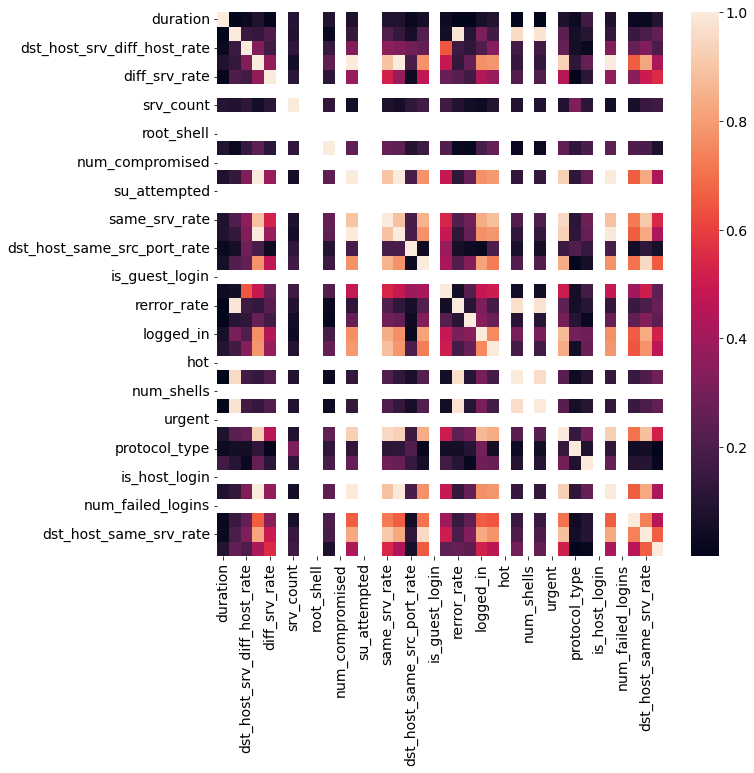

In [34]:
#BiVariate Analysis
#correlation between numerical variables
plt.figure(figsize =(10,10))
fig = sns.heatmap(data[num_cols].corr().abs())
plt.show(fig)

In [35]:
#CV calculation

(data.mean()/(data.std()+((0.01)**10))).sort_values()

is_guest_login                 0.000000
is_host_login                  0.000000
num_outbound_cmds              0.000000
num_access_files               0.000000
num_shells                     0.000000
num_file_creations             0.000000
land                           0.000000
wrong_fragment                 0.000000
urgent                         0.000000
hot                            0.000000
num_failed_logins              0.000000
num_root                       0.000000
num_compromised                0.000000
root_shell                     0.000000
su_attempted                   0.000000
duration                       0.150674
protocol_type                  0.221283
srv_rerror_rate                0.239219
dst_host_srv_rerror_rate       0.239488
rerror_rate                    0.240108
dst_host_rerror_rate           0.245022
dst_host_same_src_port_rate    0.349176
diff_srv_rate                  0.376749
srv_diff_host_rate             0.428069
src_bytes                      0.454767


In [36]:
# % of value counts in data
pd.DataFrame(data['attack_M'].value_counts()*100/data['attack_M'].value_counts().sum()).reset_index()

,index,attack_M
0,0,70.885818
1,4,27.929536
2,8,0.616906
3,6,0.364318
4,5,0.191009
5,3,0.006514
6,1,0.003687
7,7,0.001229
8,2,0.000983


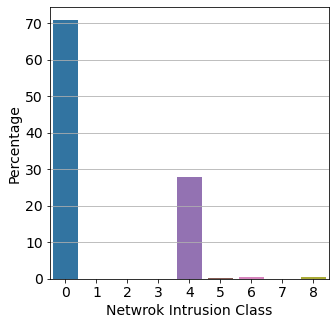

In [37]:
plt.figure(figsize =(5,5))
sns.barplot(data =pd.DataFrame(data['attack_M'].value_counts()*100/data['attack_M'].value_counts().sum()).reset_index(),x = 'index',y = 'attack_M')
plt.xlabel('Netwrok Intrusion Class')
plt.ylabel('Percentage')
plt.show()

In [38]:
X = data[data.columns.difference(['attack_B','attack_M'])]
y = data['attack_M']


In [39]:
y.value_counts()

0    576710
4    227228
8      5019
6      2964
5      1554
3        53
1        30
7        10
2         8
Name: attack_M, dtype: int64

In [40]:
ss ={1: 50000, 2: 50000, 3: 50000, 5: 50000, 6: 50000, 7: 50000, 8: 50000}

In [41]:
over = SMOTE(sampling_strategy = ss,random_state=121,n_jobs=-1)

X,y = over.fit_resample(X,y)

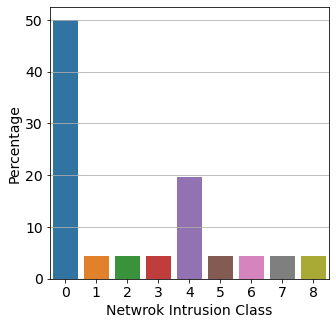

In [42]:
plt.figure(figsize =(5,5))
sns.barplot(data =pd.DataFrame(y.value_counts()*100/y.value_counts().sum()).reset_index(),x = 'index',y = 'attack_M')
plt.xlabel('Netwrok Intrusion Class')
plt.ylabel('Percentage')
plt.show()

In [43]:
X.shape

(1153938, 41)

In [44]:
y.shape

(1153938,)

In [45]:
us={0:50000,4:50000}

In [46]:

under = RandomUnderSampler(sampling_strategy = us,random_state=123)
X,y = under.fit_resample(X,y)

In [47]:
X.shape

(450000, 41)

In [48]:
y.shape


(450000,)

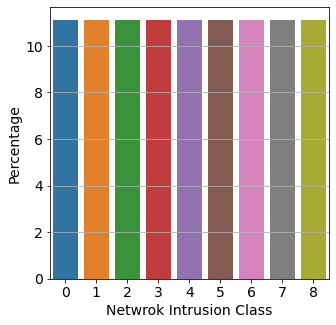

In [49]:
plt.figure(figsize =(5,5))
sns.barplot(data =pd.DataFrame(y.value_counts()*100/y.value_counts().sum()).reset_index(),x = 'index',y = 'attack_M')
plt.xlabel('Netwrok Intrusion Class')
plt.ylabel('Percentage')
plt.show()

In [50]:
#removing variables with cv<0.01 and based on ProfileReport
#removing variables with cv<0.01 and based on EDA
c =[]
for i_var in X[num_cols].columns:
    if len(X[i_var].unique())<2 :
        c.append(i_var)
            


X = X.drop(columns = c)

# 3.  Feature Engineering


## 3.1 Univariate Regression

In [51]:
#1.Using univariate logistic regression to find best features
auc_df = pd.DataFrame()
for col in X.columns:
    model =LogisticRegression(
    penalty='elasticnet',
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=121,
    solver='saga',
    max_iter=100,
    multi_class='multinomial',
    verbose=0,
    warm_start='balanced',
    n_jobs=-1,
    l1_ratio=0.5,
).fit(X[[col]],y)
    auc = metrics.roc_auc_score(y, model.predict_proba(X[[col]]),
    average='macro',
    multi_class='ovr',
    labels=[0,1, 2, 3, 4, 5, 6, 7, 8]
)
    temp = pd.DataFrame([col, auc]).T
    auc_df = pd.concat([auc_df, temp], axis=0)

#Extracting important features
auc_df.columns = ['feature', 'auc']
auc_df.sort_values(by='auc', inplace=True, ascending=False)
imp_vars_AUC = list(auc_df.head(15)['feature'])
imp_vars_AUC

['dst_host_count',
 'dst_bytes',
 'src_bytes',
 'dst_host_same_srv_rate',
 'service',
 'flag',
 'logged_in',
 'dst_host_same_src_port_rate',
 'dst_host_srv_count',
 'count',
 'rerror_rate',
 'dst_host_rerror_rate',
 'dst_host_diff_srv_rate',
 'diff_srv_rate',
 'dst_host_serror_rate']

In [52]:
imp_vars_AUC

['dst_host_count',
 'dst_bytes',
 'src_bytes',
 'dst_host_same_srv_rate',
 'service',
 'flag',
 'logged_in',
 'dst_host_same_src_port_rate',
 'dst_host_srv_count',
 'count',
 'rerror_rate',
 'dst_host_rerror_rate',
 'dst_host_diff_srv_rate',
 'diff_srv_rate',
 'dst_host_serror_rate']

In [53]:
auc_df.head(15)

,feature,auc
0,dst_host_count,0.807844
0,dst_bytes,0.797076
0,src_bytes,0.786512
0,dst_host_same_srv_rate,0.777423
0,service,0.776795
0,flag,0.77204
0,logged_in,0.763673
0,dst_host_same_src_port_rate,0.760154
0,dst_host_srv_count,0.751189
0,count,0.73307


## 3.2 RFE

In [54]:
#### RFE
#Try with RFE_CV

classifier = RandomForestClassifier(n_jobs=-1,class_weight = 'balanced')
rfe = RFE(classifier,n_features_to_select=15)
rfe = rfe.fit(X,y )

imp_vars_RFE = list(X.columns[rfe.support_])


In [55]:
imp_vars_RFE

['count',
 'dst_bytes',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_rerror_rate',
 'dst_host_same_src_port_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'flag',
 'logged_in',
 'protocol_type',
 'rerror_rate',
 'service',
 'src_bytes']

## 3.3 Select K Best

In [56]:
SKB = SelectKBest(f_classif,k=10)
SKB.fit(X,y)

imp_vars_SKB = list(X.columns[SKB.get_support()])


In [57]:
imp_vars_SKB

['dst_host_count',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_rerror_rate',
 'flag',
 'logged_in',
 'rerror_rate',
 'same_srv_rate',
 'srv_rerror_rate']

In [58]:
imp_vars = list(set(imp_vars_RFE+imp_vars_SKB+imp_vars_AUC))
imp_vars

['srv_rerror_rate',
 'diff_srv_rate',
 'same_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_count',
 'dst_host_count',
 'rerror_rate',
 'dst_bytes',
 'count',
 'logged_in',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'flag',
 'protocol_type',
 'src_bytes',
 'dst_host_serror_rate',
 'service',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate']

## VIF

In [59]:
#VIF
#### VIF
feature=imp_vars.copy()
a=np.inf
while a>=5:
    vif=[variance_inflation_factor(X[feature].values,i) for i in range(X[feature].shape[1])]
    vif=pd.Series(vif,name='VIF')
    fet=pd.Series(X[feature].columns,name='Feature')
    vifdf=pd.concat([vif,fet],axis=1).sort_values(by="VIF")
    a=vifdf['VIF'].max()
    if a<=5:
        break
    feature=list(vifdf[:-1]["Feature"])



In [60]:
feature

['dst_bytes',
 'src_bytes',
 'dst_host_srv_count',
 'protocol_type',
 'dst_host_serror_rate',
 'diff_srv_rate',
 'dst_host_same_src_port_rate',
 'count',
 'service',
 'dst_host_diff_srv_rate',
 'dst_host_count',
 'logged_in',
 'dst_host_rerror_rate']

In [61]:
vifdf

,VIF,Feature
0,1.608368,dst_bytes
1,1.769255,src_bytes
12,2.005115,dst_host_rerror_rate
2,2.033293,dst_host_srv_count
3,2.325276,protocol_type
4,2.578585,dst_host_serror_rate
5,3.338316,diff_srv_rate
7,3.397543,count
6,3.430567,dst_host_same_src_port_rate
8,3.563908,service


In [62]:
X = X[list(feature)]

In [63]:
X.head()

,dst_bytes,src_bytes,dst_host_srv_count,protocol_type,dst_host_serror_rate,diff_srv_rate,dst_host_same_src_port_rate,count,service,dst_host_diff_srv_rate,dst_host_count,logged_in,dst_host_rerror_rate
0,0.09136,0.00201,0.255,0.0,0.0,0.0,0.050,0.002,0.00,0.000,0.002,0.1,0.0
1,0.01047,0.00239,0.255,0.0,0.0,0.0,0.000,0.033,0.00,0.000,0.255,0.1,0.0
2,0.00331,0.01575,0.124,0.0,0.0,0.0,0.000,0.001,0.01,0.002,0.255,0.1,0.0
3,0.02229,0.00199,0.255,0.0,0.0,0.0,0.003,0.001,0.00,0.000,0.033,0.1,0.0
4,0.00349,0.00334,0.255,0.0,0.0,0.0,0.000,0.001,0.00,0.000,0.255,0.1,0.0


## Train Test Split

In [64]:
#Splitting train and test(To balance the data only on train vars)
train_X,test_X,train_y,test_y = train_test_split(X,y, test_size=0.15,random_state =122,stratify = y)

In [65]:
train_X.shape

(382500, 13)

In [66]:
train_X.shape

(382500, 13)

In [67]:
train_y.shape

(382500,)

In [68]:
test_X.shape

(67500, 13)

In [69]:
test_y.shape

(67500,)

In [70]:
train_y.value_counts()*100/(train_y.value_counts().sum())

8    11.111111
1    11.111111
6    11.111111
3    11.111111
4    11.111111
7    11.111111
2    11.111111
5    11.111111
0    11.111111
Name: attack_M, dtype: float64

In [71]:
test_y.value_counts()*100/(test_y.value_counts().sum())

5    11.111111
8    11.111111
6    11.111111
7    11.111111
4    11.111111
2    11.111111
3    11.111111
1    11.111111
0    11.111111
Name: attack_M, dtype: float64

# Models

## Logistic Regression

In [72]:
logit_model = LogisticRegression(class_weight='balanced').fit(train_X,train_y)






In [73]:
logit_model.feature_names_in_

array(['dst_bytes', 'src_bytes', 'dst_host_srv_count', 'protocol_type',
       'dst_host_serror_rate', 'diff_srv_rate',
       'dst_host_same_src_port_rate', 'count', 'service',
       'dst_host_diff_srv_rate', 'dst_host_count', 'logged_in',
       'dst_host_rerror_rate'], dtype=object)

In [74]:
train_pred = logit_model.predict(train_X)
test_pred = logit_model.predict(test_X)

train_pred_prob = logit_model.predict_proba(train_X)
test_pred_prob = logit_model.predict_proba(test_X)

cm_train_logit =  pd.crosstab(train_y,train_pred)

cm_test_logit  =  pd.crosstab(test_y,test_pred)

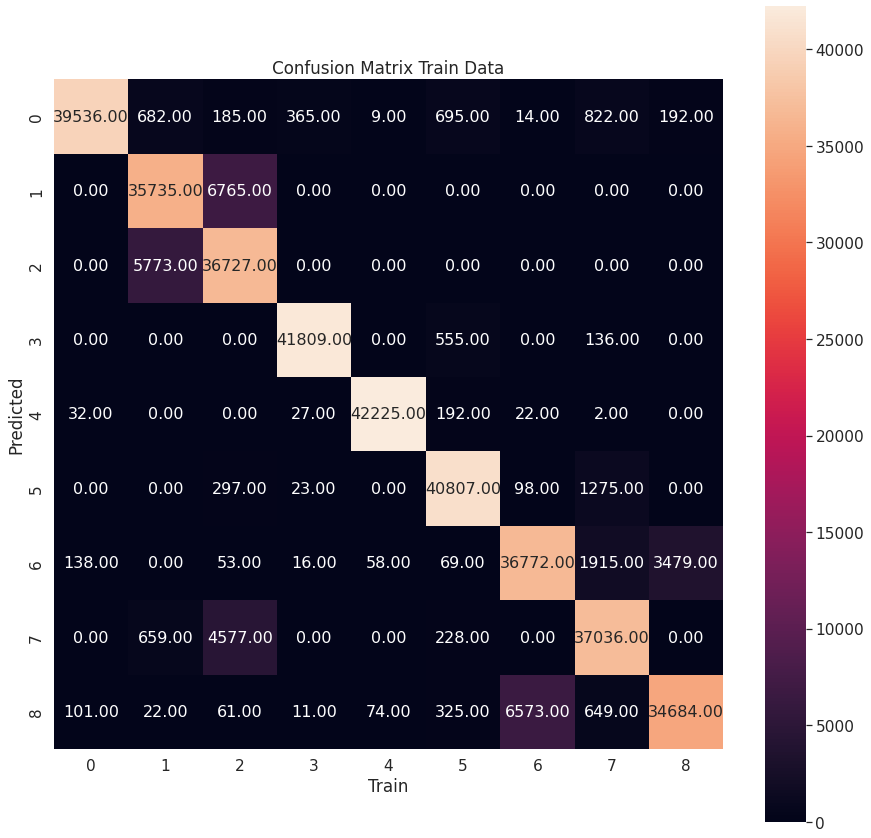

In [75]:
#Displaying confusion matrix
#Other option :- from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
plt.figure(figsize = (15,15))
sns.set(font_scale=1.4) 
sns.heatmap(cm_train_logit,annot = True,annot_kws = {"size":16},square =True,fmt = '.2f')
plt.title('Confusion Matrix Train Data')
plt.xlabel('Train')
plt.ylabel('Predicted')
plt.show()

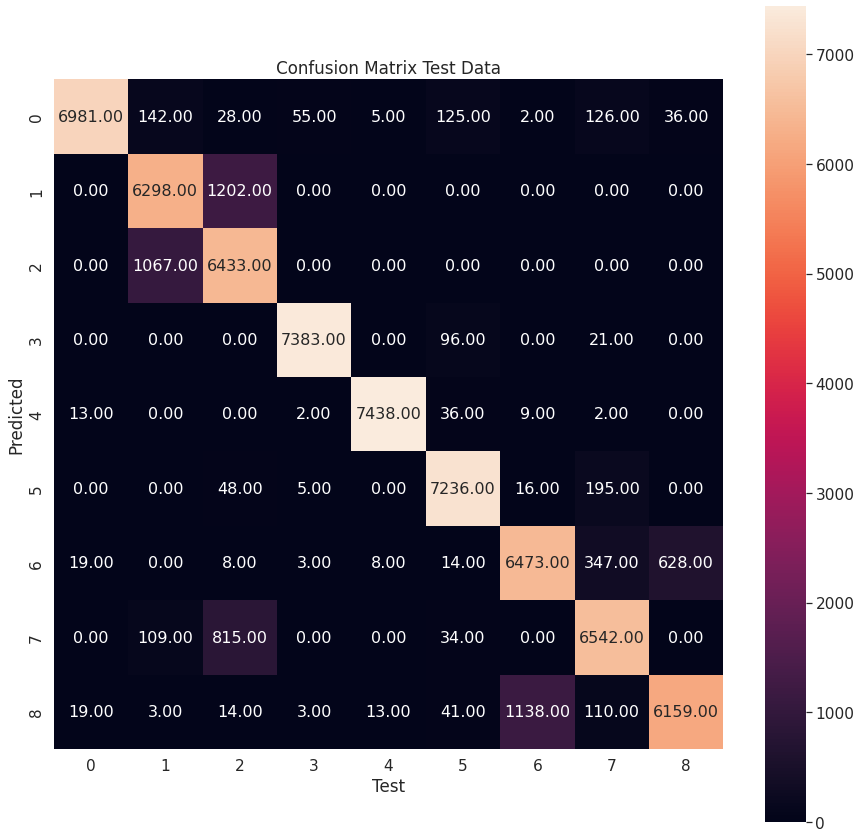

In [76]:
plt.figure(figsize = (15,15))
sns.set(font_scale=1.4) 
sns.heatmap(cm_test_logit,annot = True,annot_kws = {"size":16},square =True,fmt = '.2f')
plt.title('Confusion Matrix Test Data')
plt.xlabel('Test')
plt.ylabel('Predicted')
plt.show()

In [77]:
print(metrics.classification_report(train_y,train_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     42500
           1       0.83      0.84      0.84     42500
           2       0.75      0.86      0.81     42500
           3       0.99      0.98      0.99     42500
           4       1.00      0.99      1.00     42500
           5       0.95      0.96      0.96     42500
           6       0.85      0.87      0.86     42500
           7       0.89      0.87      0.88     42500
           8       0.90      0.82      0.86     42500

    accuracy                           0.90    382500
   macro avg       0.91      0.90      0.90    382500
weighted avg       0.91      0.90      0.90    382500



In [78]:
print("R2 value train data: ",metrics.r2_score(train_y,train_pred))

R2 value train data:  0.88108


In [79]:
print(metrics.classification_report(test_y,test_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      7500
           1       0.83      0.84      0.83      7500
           2       0.75      0.86      0.80      7500
           3       0.99      0.98      0.99      7500
           4       1.00      0.99      0.99      7500
           5       0.95      0.96      0.96      7500
           6       0.85      0.86      0.86      7500
           7       0.89      0.87      0.88      7500
           8       0.90      0.82      0.86      7500

    accuracy                           0.90     67500
   macro avg       0.91      0.90      0.90     67500
weighted avg       0.91      0.90      0.90     67500



In [80]:
print("R2 value test data: ",metrics.r2_score(test_y,test_pred))

R2 value test data:  0.8835533333333333


In [81]:
print("ROC score train data: ",metrics.roc_auc_score(train_y,train_pred_prob,average='macro',
    multi_class='ovr'
    ))

ROC score train data:  0.9944127442291426


In [82]:
print("ROC score train data: ",metrics.roc_auc_score(test_y,test_pred_prob,average='macro',
    multi_class='ovr'))

ROC score train data:  0.9946322474074074


## K Nearest Neighbour Classification

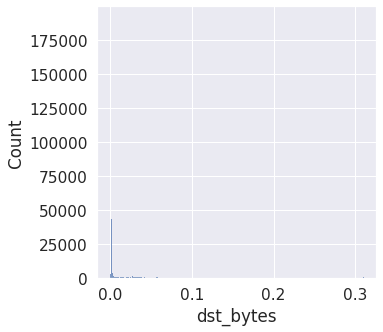

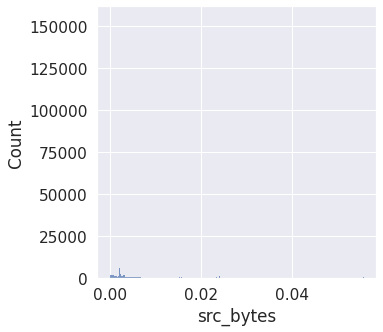

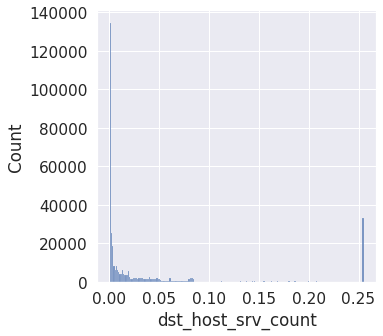

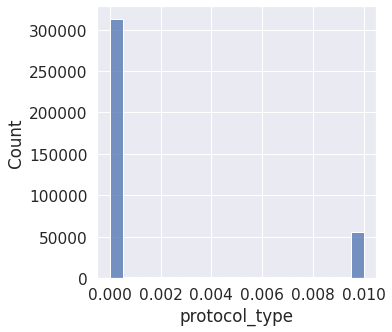

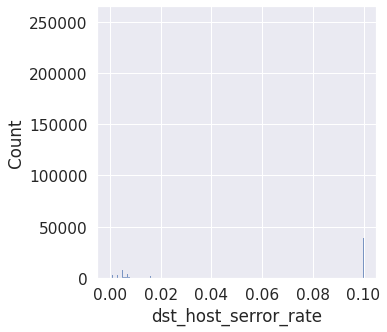

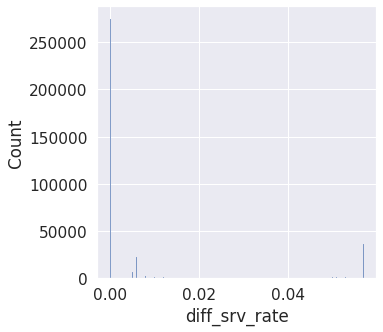

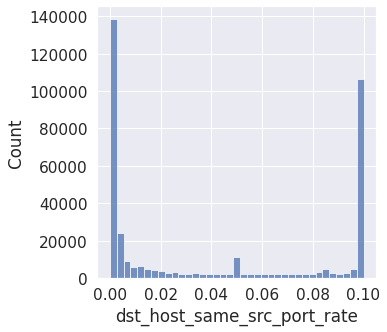

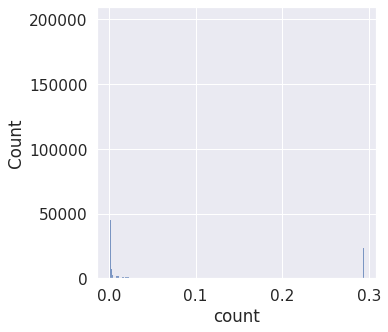

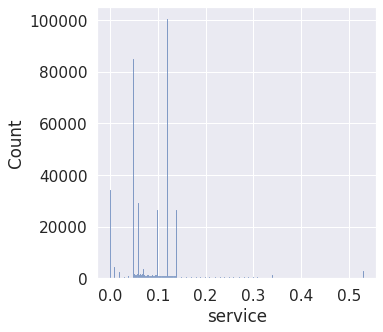

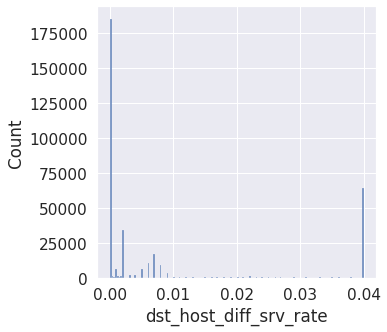

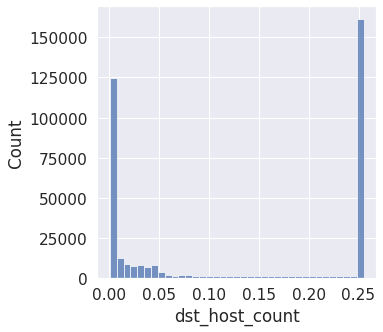

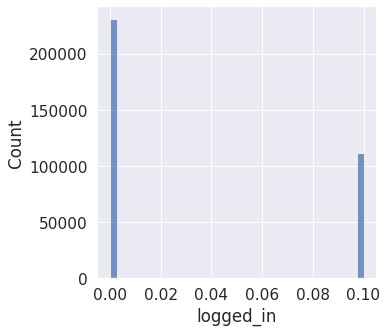

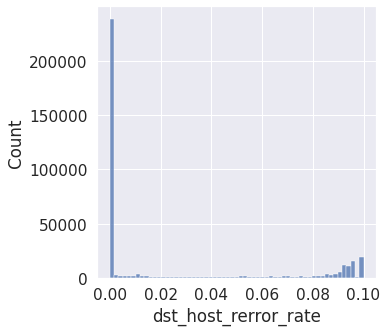

In [83]:
for i in train_X.columns:
    plt.figure(figsize= (5,5))
    sns.histplot(train_X[i])
    plt.show()

In [84]:
from sklearn.preprocessing import PowerTransformer

In [85]:
#normalising and standardising X_vars using power transformer
pt= PowerTransformer(method='yeo-johnson',standardize=True, copy=True)
train_X_std = pd.DataFrame(pt.fit_transform(train_X),columns = train_X.columns)

In [86]:
test_X_std = pd.DataFrame(pt.transform(test_X),columns = test_X.columns)

In [87]:
train_X_std.describe()

,dst_bytes,src_bytes,dst_host_srv_count,protocol_type,dst_host_serror_rate,diff_srv_rate,dst_host_same_src_port_rate,count,service,dst_host_diff_srv_rate,dst_host_count,logged_in,dst_host_rerror_rate
count,3.825000e+05,3.825000e+05,3.825000e+05,3.825000e+05,3.825000e+05,3.825000e+05,3.825000e+05,3.825000e+05,3.825000e+05,3.825000e+05,3.825000e+05,3.825000e+05,3.825000e+05
mean,1.273868e-16,-6.501698e-19,4.987731e-17,-1.523255e-16,4.230748e-18,1.875461e-16,2.489222e-18,-5.977847e-17,-1.914100e-16,1.311485e-16,-1.029869e-16,-1.486474e-16,7.222458e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-6.784359e-01,-8.126638e-01,-8.384249e-01,-4.704492e-01,-5.992959e-01,-5.800809e-01,-1.011561e+00,-6.197969e-01,-2.000871e+00,-7.989315e-01,-1.100304e+00,-7.807112e-01,-7.259215e-01
25%,-6.784359e-01,-8.126638e-01,-8.122922e-01,-4.704492e-01,-5.992959e-01,-5.800809e-01,-1.011561e+00,-6.197969e-01,-6.485548e-01,-7.989315e-01,-1.080789e+00,-7.807112e-01,-7.259215e-01
50%,-6.222058e-01,-5.201227e-01,-5.540212e-01,-4.704492e-01,-5.992959e-01,-5.800809e-01,-4.177023e-01,-6.035528e-01,3.077970e-01,-5.893983e-01,-1.306351e-01,-7.807112e-01,-7.259215e-01
75%,5.081748e-01,5.853227e-01,7.529458e-01,-4.704492e-01,3.052213e-01,6.967649e-01,1.266863e+00,2.923648e-01,6.095312e-01,6.610362e-01,1.067979e+00,1.380514e+00,1.324629e+00
max,2.137607e+00,2.248281e+00,1.909925e+00,2.176433e+00,2.226957e+00,2.159169e+00,1.266863e+00,1.953287e+00,2.777317e+00,1.705014e+00,1.067979e+00,1.380514e+00,1.589332e+00


In [88]:
knn = KNeighborsClassifier(n_neighbors=5,
    weights='distance',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=-1)
knn.fit(train_X_std,train_y)

KNeighborsClassifier(n_jobs=-1, weights='distance')

In [89]:
train_pred = knn.predict(train_X_std)

In [90]:
print(metrics.classification_report(train_y,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42500
           1       1.00      1.00      1.00     42500
           2       1.00      1.00      1.00     42500
           3       1.00      1.00      1.00     42500
           4       1.00      1.00      1.00     42500
           5       1.00      1.00      1.00     42500
           6       1.00      1.00      1.00     42500
           7       1.00      1.00      1.00     42500
           8       1.00      1.00      1.00     42500

    accuracy                           1.00    382500
   macro avg       1.00      1.00      1.00    382500
weighted avg       1.00      1.00      1.00    382500



In [91]:
test_pred = knn.predict(test_X_std)


In [92]:
print(metrics.classification_report(test_y,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7500
           1       1.00      1.00      1.00      7500
           2       1.00      1.00      1.00      7500
           3       1.00      1.00      1.00      7500
           4       1.00      1.00      1.00      7500
           5       1.00      1.00      1.00      7500
           6       1.00      1.00      1.00      7500
           7       1.00      1.00      1.00      7500
           8       1.00      1.00      1.00      7500

    accuracy                           1.00     67500
   macro avg       1.00      1.00      1.00     67500
weighted avg       1.00      1.00      1.00     67500



In [93]:
cm_train = pd.crosstab(train_y,train_pred)
cm_train

col_0,0,1,2,3,4,5,6,7,8
attack_M,,,,,,,,,
0,42500,0,0,0,0,0,0,0,0
1,0,42500,0,0,0,0,0,0,0
2,0,0,42500,0,0,0,0,0,0
3,0,0,0,42500,0,0,0,0,0
4,0,0,0,0,42500,0,0,0,0
5,0,0,0,0,0,42500,0,0,0
6,0,0,0,0,0,1,42499,0,0
7,0,0,0,0,0,0,0,42500,0
8,0,0,0,0,0,0,0,0,42500


In [94]:
cm_test = pd.crosstab(test_y,test_pred)
cm_test

col_0,0,1,2,3,4,5,6,7,8
attack_M,,,,,,,,,
0,7489,3,1,1,1,0,1,0,4
1,0,7500,0,0,0,0,0,0,0
2,0,0,7500,0,0,0,0,0,0
3,0,0,0,7500,0,0,0,0,0
4,0,0,0,0,7500,0,0,0,0
5,0,0,0,0,0,7500,0,0,0
6,0,0,0,0,0,0,7498,1,1
7,0,0,0,0,0,0,0,7500,0
8,0,0,0,0,0,0,3,0,7497


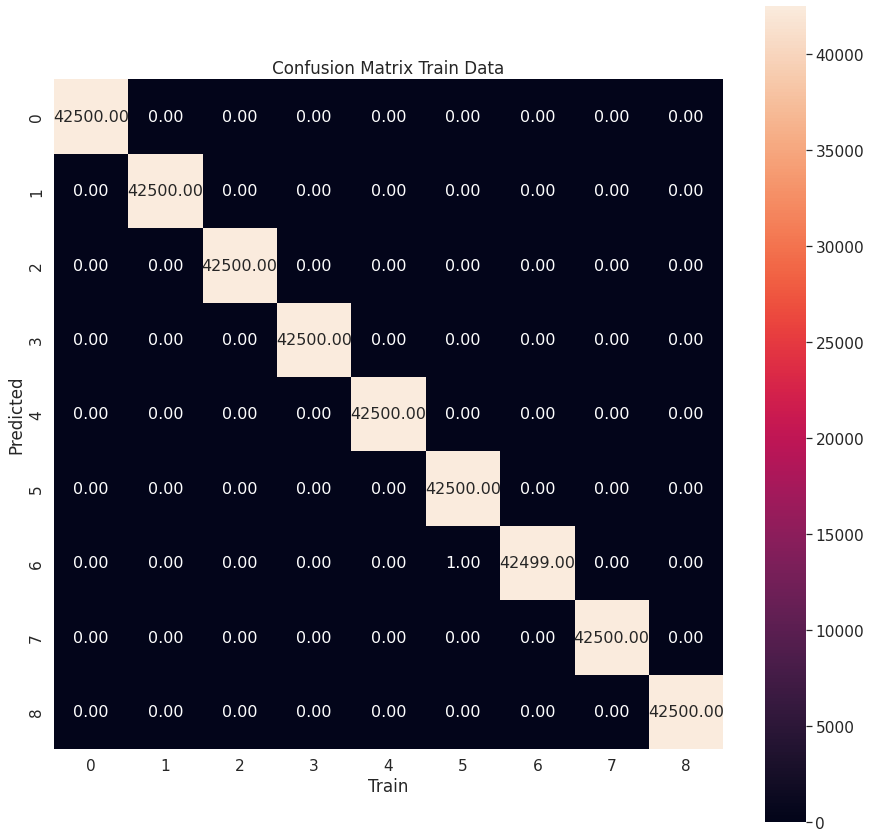

In [95]:
plt.figure(figsize=(15,15))
sns.set(font_scale=1.4) 
sns.heatmap(cm_train,annot = True,annot_kws = {"size":16},square =True,fmt = '.2f')
plt.title('Confusion Matrix Train Data')
plt.xlabel('Train')
plt.ylabel('Predicted')
plt.show()

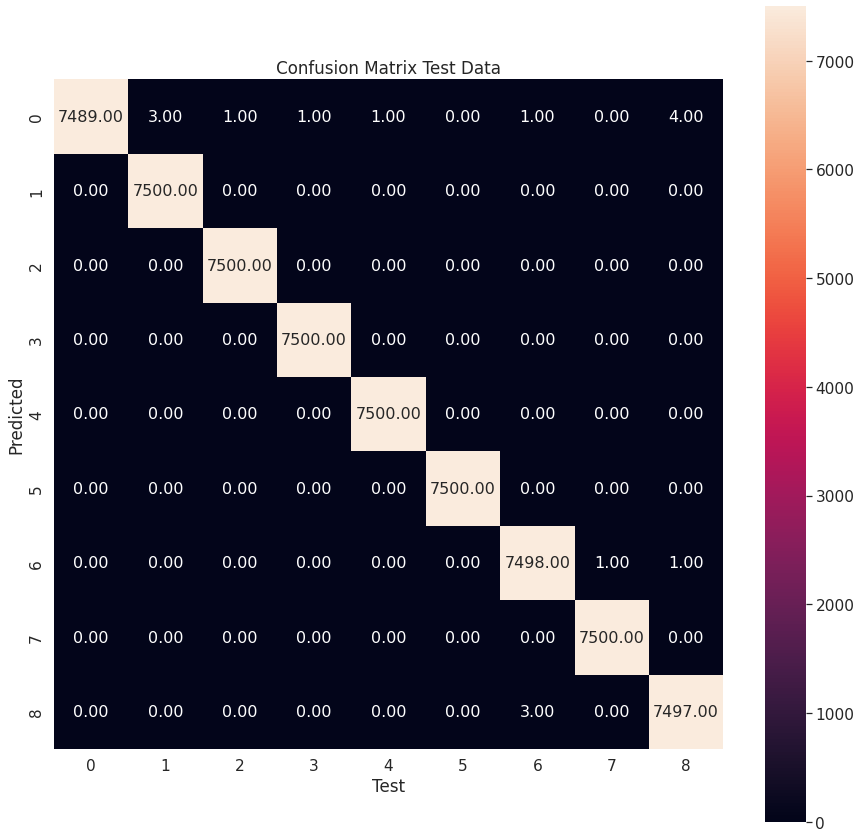

In [96]:
plt.figure(figsize = (15,15))
sns.set(font_scale=1.4) 
sns.heatmap(cm_test,annot = True,annot_kws = {"size":16},square =True,fmt = '.2f')
plt.title('Confusion Matrix Test Data')
plt.xlabel('Test')
plt.ylabel('Predicted')
plt.show()

## RandomForest Model

In [97]:
r_clf = RandomForestClassifier(n_estimators=100,criterion="gini", max_depth=5, min_samples_split=30,min_samples_leaf =5, max_features="auto",bootstrap=True, oob_score=True, n_jobs=-1,class_weight='balanced',random_state=999, verbose=1,)

In [98]:
r_clf.fit(train_X,train_y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.5s finished


RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=5,
                       min_samples_split=30, n_jobs=-1, oob_score=True,
                       random_state=999, verbose=1)

In [99]:
train_pred = r_clf.predict(train_X)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.5s finished


In [100]:
print(metrics.classification_report(train_y,train_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     42500
           1       0.94      1.00      0.97     42500
           2       0.98      1.00      0.99     42500
           3       1.00      1.00      1.00     42500
           4       1.00      1.00      1.00     42500
           5       0.92      1.00      0.96     42500
           6       0.99      1.00      0.99     42500
           7       0.98      0.86      0.91     42500
           8       1.00      0.98      0.99     42500

    accuracy                           0.98    382500
   macro avg       0.98      0.98      0.98    382500
weighted avg       0.98      0.98      0.98    382500



In [101]:
test_pred = r_clf.predict(test_X)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


In [102]:
print(metrics.classification_report(test_y,test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      7500
           1       0.94      1.00      0.97      7500
           2       0.98      1.00      0.99      7500
           3       1.00      1.00      1.00      7500
           4       1.00      1.00      1.00      7500
           5       0.92      1.00      0.96      7500
           6       0.99      1.00      0.99      7500
           7       0.98      0.85      0.91      7500
           8       1.00      0.98      0.99      7500

    accuracy                           0.98     67500
   macro avg       0.98      0.98      0.98     67500
weighted avg       0.98      0.98      0.98     67500



In [103]:
pd.crosstab(train_y,train_pred)

col_0,0,1,2,3,4,5,6,7,8
attack_M,,,,,,,,,
0,41431,6,50,0,1,465,80,443,24
1,0,42497,3,0,0,0,0,0,0
2,0,0,42500,0,0,0,0,0,0
3,0,0,0,42500,0,0,0,0,0
4,0,0,0,0,42453,25,22,0,0
5,0,0,0,0,0,42460,3,37,0
6,26,0,0,0,0,15,42407,15,37
7,0,2623,835,0,0,2696,0,36346,0
8,111,0,9,0,0,344,355,133,41548


In [104]:
pd.crosstab(test_y,test_pred)

col_0,0,1,2,3,4,5,6,7,8
attack_M,,,,,,,,,
0,7315,3,14,0,0,78,13,74,3
1,0,7499,1,0,0,0,0,0,0
2,0,0,7500,0,0,0,0,0,0
3,0,0,0,7500,0,0,0,0,0
4,0,0,0,0,7492,2,6,0,0
5,0,0,0,0,0,7492,0,8,0
6,5,0,0,0,0,3,7482,3,7
7,0,446,144,0,0,507,0,6403,0
8,17,0,2,0,0,68,66,14,7333


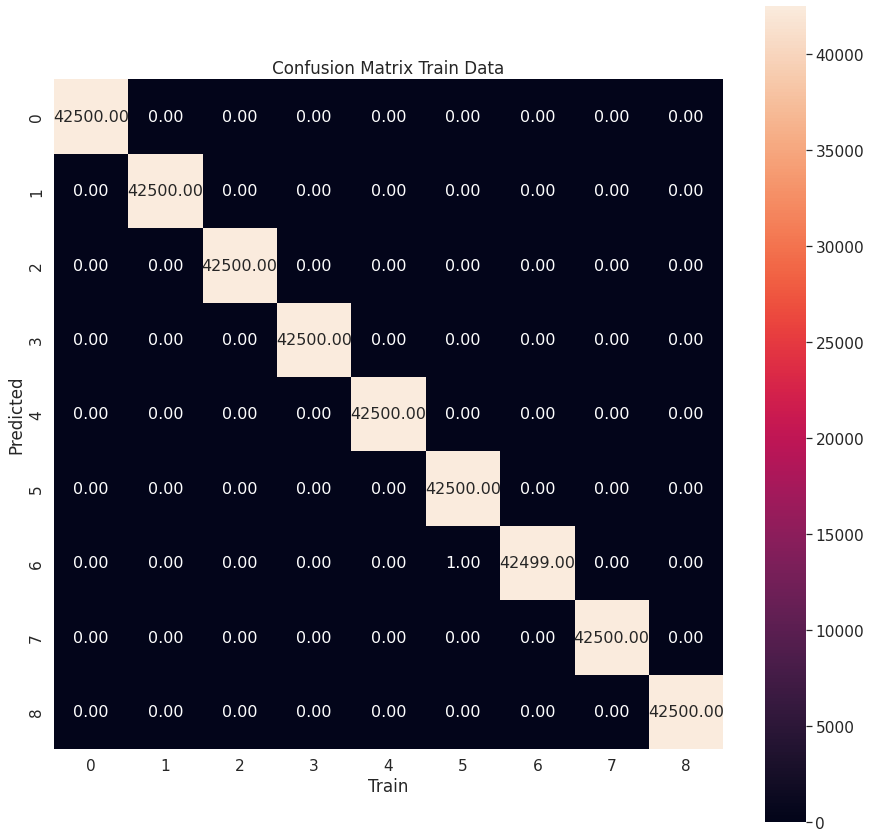

In [105]:
plt.figure(figsize=(15,15))
sns.set(font_scale=1.4) 
sns.heatmap(cm_train,annot = True,annot_kws = {"size":16},square =True,fmt = '.2f')
plt.title('Confusion Matrix Train Data')
plt.xlabel('Train')
plt.ylabel('Predicted')
plt.show()

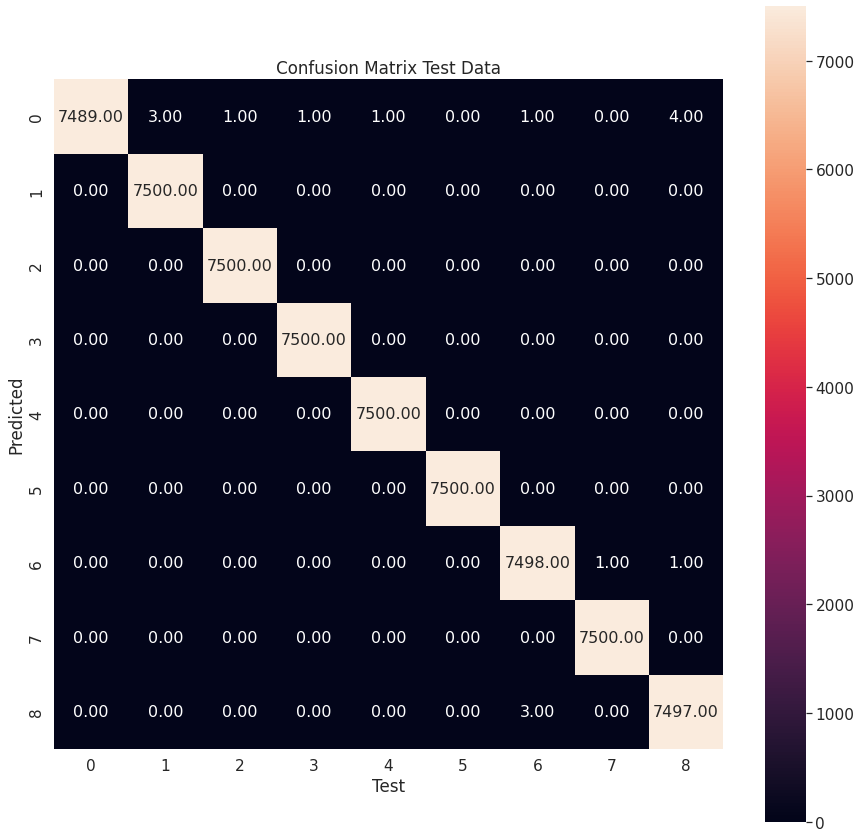

In [106]:
plt.figure(figsize = (15,15))
sns.set(font_scale=1.4) 
sns.heatmap(cm_test,annot = True,annot_kws = {"size":16},square =True,fmt = '.2f')
plt.title('Confusion Matrix Test Data')
plt.xlabel('Test')
plt.ylabel('Predicted')
plt.show()

## XGBoost Classifier

In [107]:
#base model
xgb_model = XGBClassifier(n_jobs=-1, random_state=142)
xgb_model.fit(train_X,train_y)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=142, reg_alpha=0, ...)

In [108]:
train_pred = xgb_model.predict(train_X)
test_pred = xgb_model.predict(test_X)

In [109]:
print(metrics.classification_report(train_y,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42500
           1       1.00      1.00      1.00     42500
           2       1.00      1.00      1.00     42500
           3       1.00      1.00      1.00     42500
           4       1.00      1.00      1.00     42500
           5       1.00      1.00      1.00     42500
           6       1.00      1.00      1.00     42500
           7       1.00      1.00      1.00     42500
           8       1.00      1.00      1.00     42500

    accuracy                           1.00    382500
   macro avg       1.00      1.00      1.00    382500
weighted avg       1.00      1.00      1.00    382500



In [110]:
print(metrics.classification_report(test_y,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7500
           1       1.00      1.00      1.00      7500
           2       1.00      1.00      1.00      7500
           3       1.00      1.00      1.00      7500
           4       1.00      1.00      1.00      7500
           5       1.00      1.00      1.00      7500
           6       1.00      1.00      1.00      7500
           7       1.00      1.00      1.00      7500
           8       1.00      1.00      1.00      7500

    accuracy                           1.00     67500
   macro avg       1.00      1.00      1.00     67500
weighted avg       1.00      1.00      1.00     67500



In [111]:
pd.crosstab(train_y,train_pred)

col_0,0,1,2,3,4,5,6,7,8
attack_M,,,,,,,,,
0,42500,0,0,0,0,0,0,0,0
1,0,42500,0,0,0,0,0,0,0
2,0,0,42500,0,0,0,0,0,0
3,0,0,0,42500,0,0,0,0,0
4,0,0,0,0,42500,0,0,0,0
5,0,0,0,0,0,42500,0,0,0
6,0,0,0,0,0,1,42499,0,0
7,0,0,0,0,0,0,0,42500,0
8,0,0,0,0,0,0,0,0,42500


In [112]:
pd.crosstab(test_y,test_pred)

col_0,0,1,2,3,4,5,6,7,8
attack_M,,,,,,,,,
0,7496,2,0,0,1,0,1,0,0
1,0,7499,1,0,0,0,0,0,0
2,0,0,7500,0,0,0,0,0,0
3,0,0,0,7500,0,0,0,0,0
4,0,0,0,0,7500,0,0,0,0
5,0,0,0,0,0,7499,0,0,1
6,0,0,0,0,0,0,7499,1,0
7,0,0,0,0,0,0,0,7500,0
8,0,0,0,0,0,0,0,0,7500


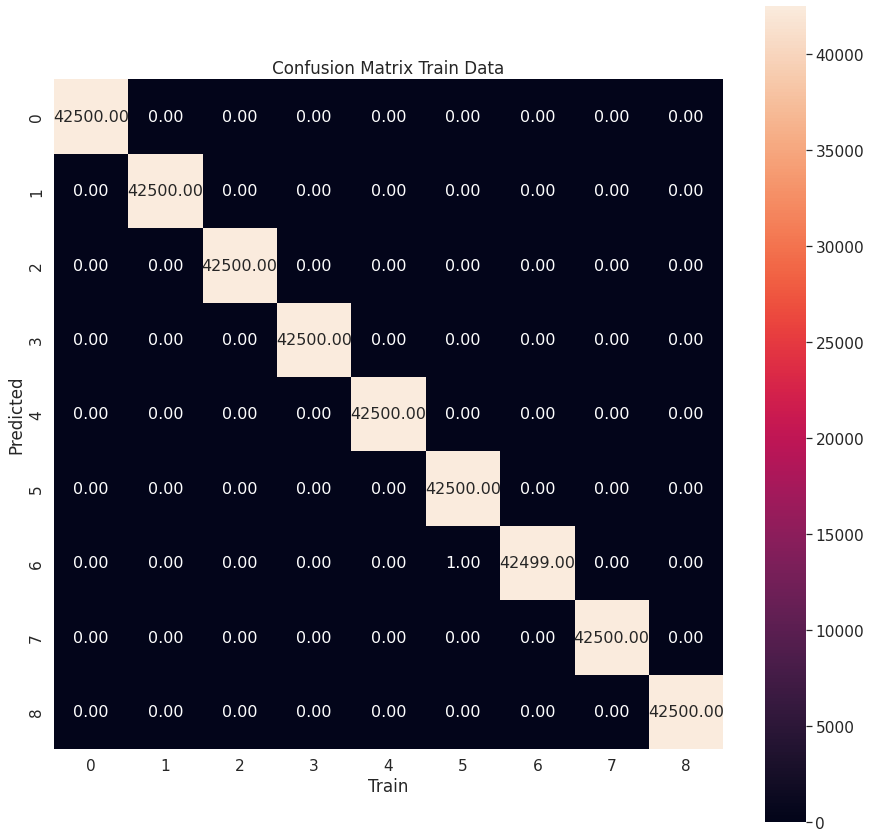

In [113]:
plt.figure(figsize=(15,15))
sns.set(font_scale=1.4) 
sns.heatmap(cm_train,annot = True,annot_kws = {"size":16},square =True,fmt = '.2f')
plt.title('Confusion Matrix Train Data')
plt.xlabel('Train')
plt.ylabel('Predicted')
plt.show()

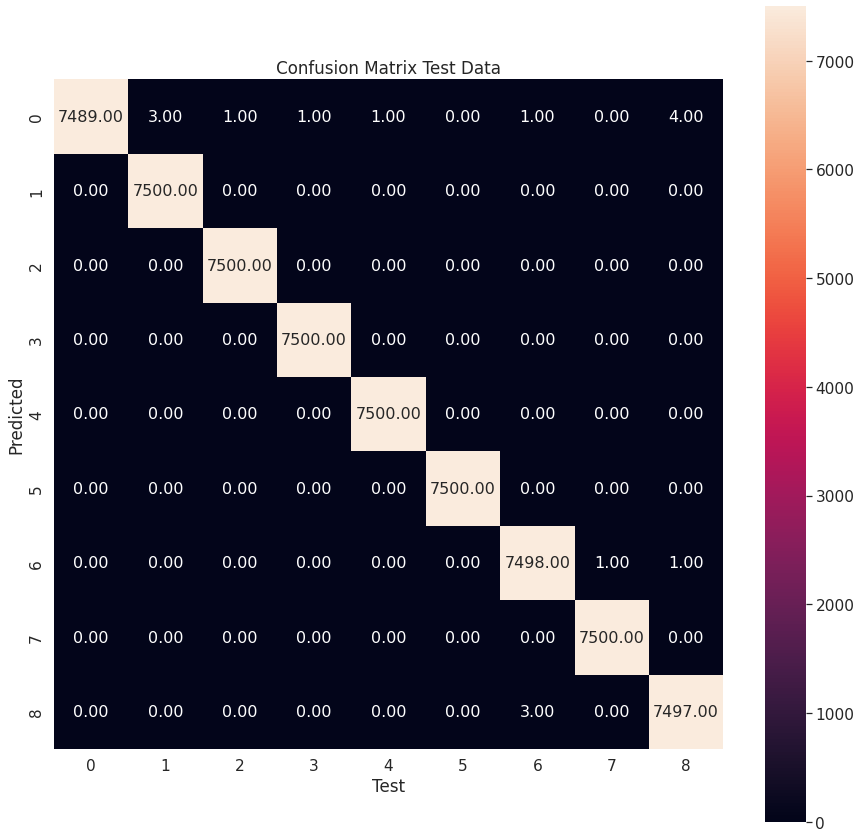

In [114]:
plt.figure(figsize = (15,15))
sns.set(font_scale=1.4) 
sns.heatmap(cm_test,annot = True,annot_kws = {"size":16},square =True,fmt = '.2f')
plt.title('Confusion Matrix Test Data')
plt.xlabel('Test')
plt.ylabel('Predicted')
plt.show()

## Saving the models

In [115]:
cd /kaggle/working

/kaggle/working


In [116]:
import pickle
PIK = "MC_Models.pkl"
model = [xgb_model, r_clf,knn,logit_model]
with open(PIK, "wb") as f:
    pickle.dump(model, f)